# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.model_selection import cross_validate
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


In [128]:
df = pd.read_csv("Wholesale_Data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [129]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [130]:
# all integers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [131]:
# no missing data
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

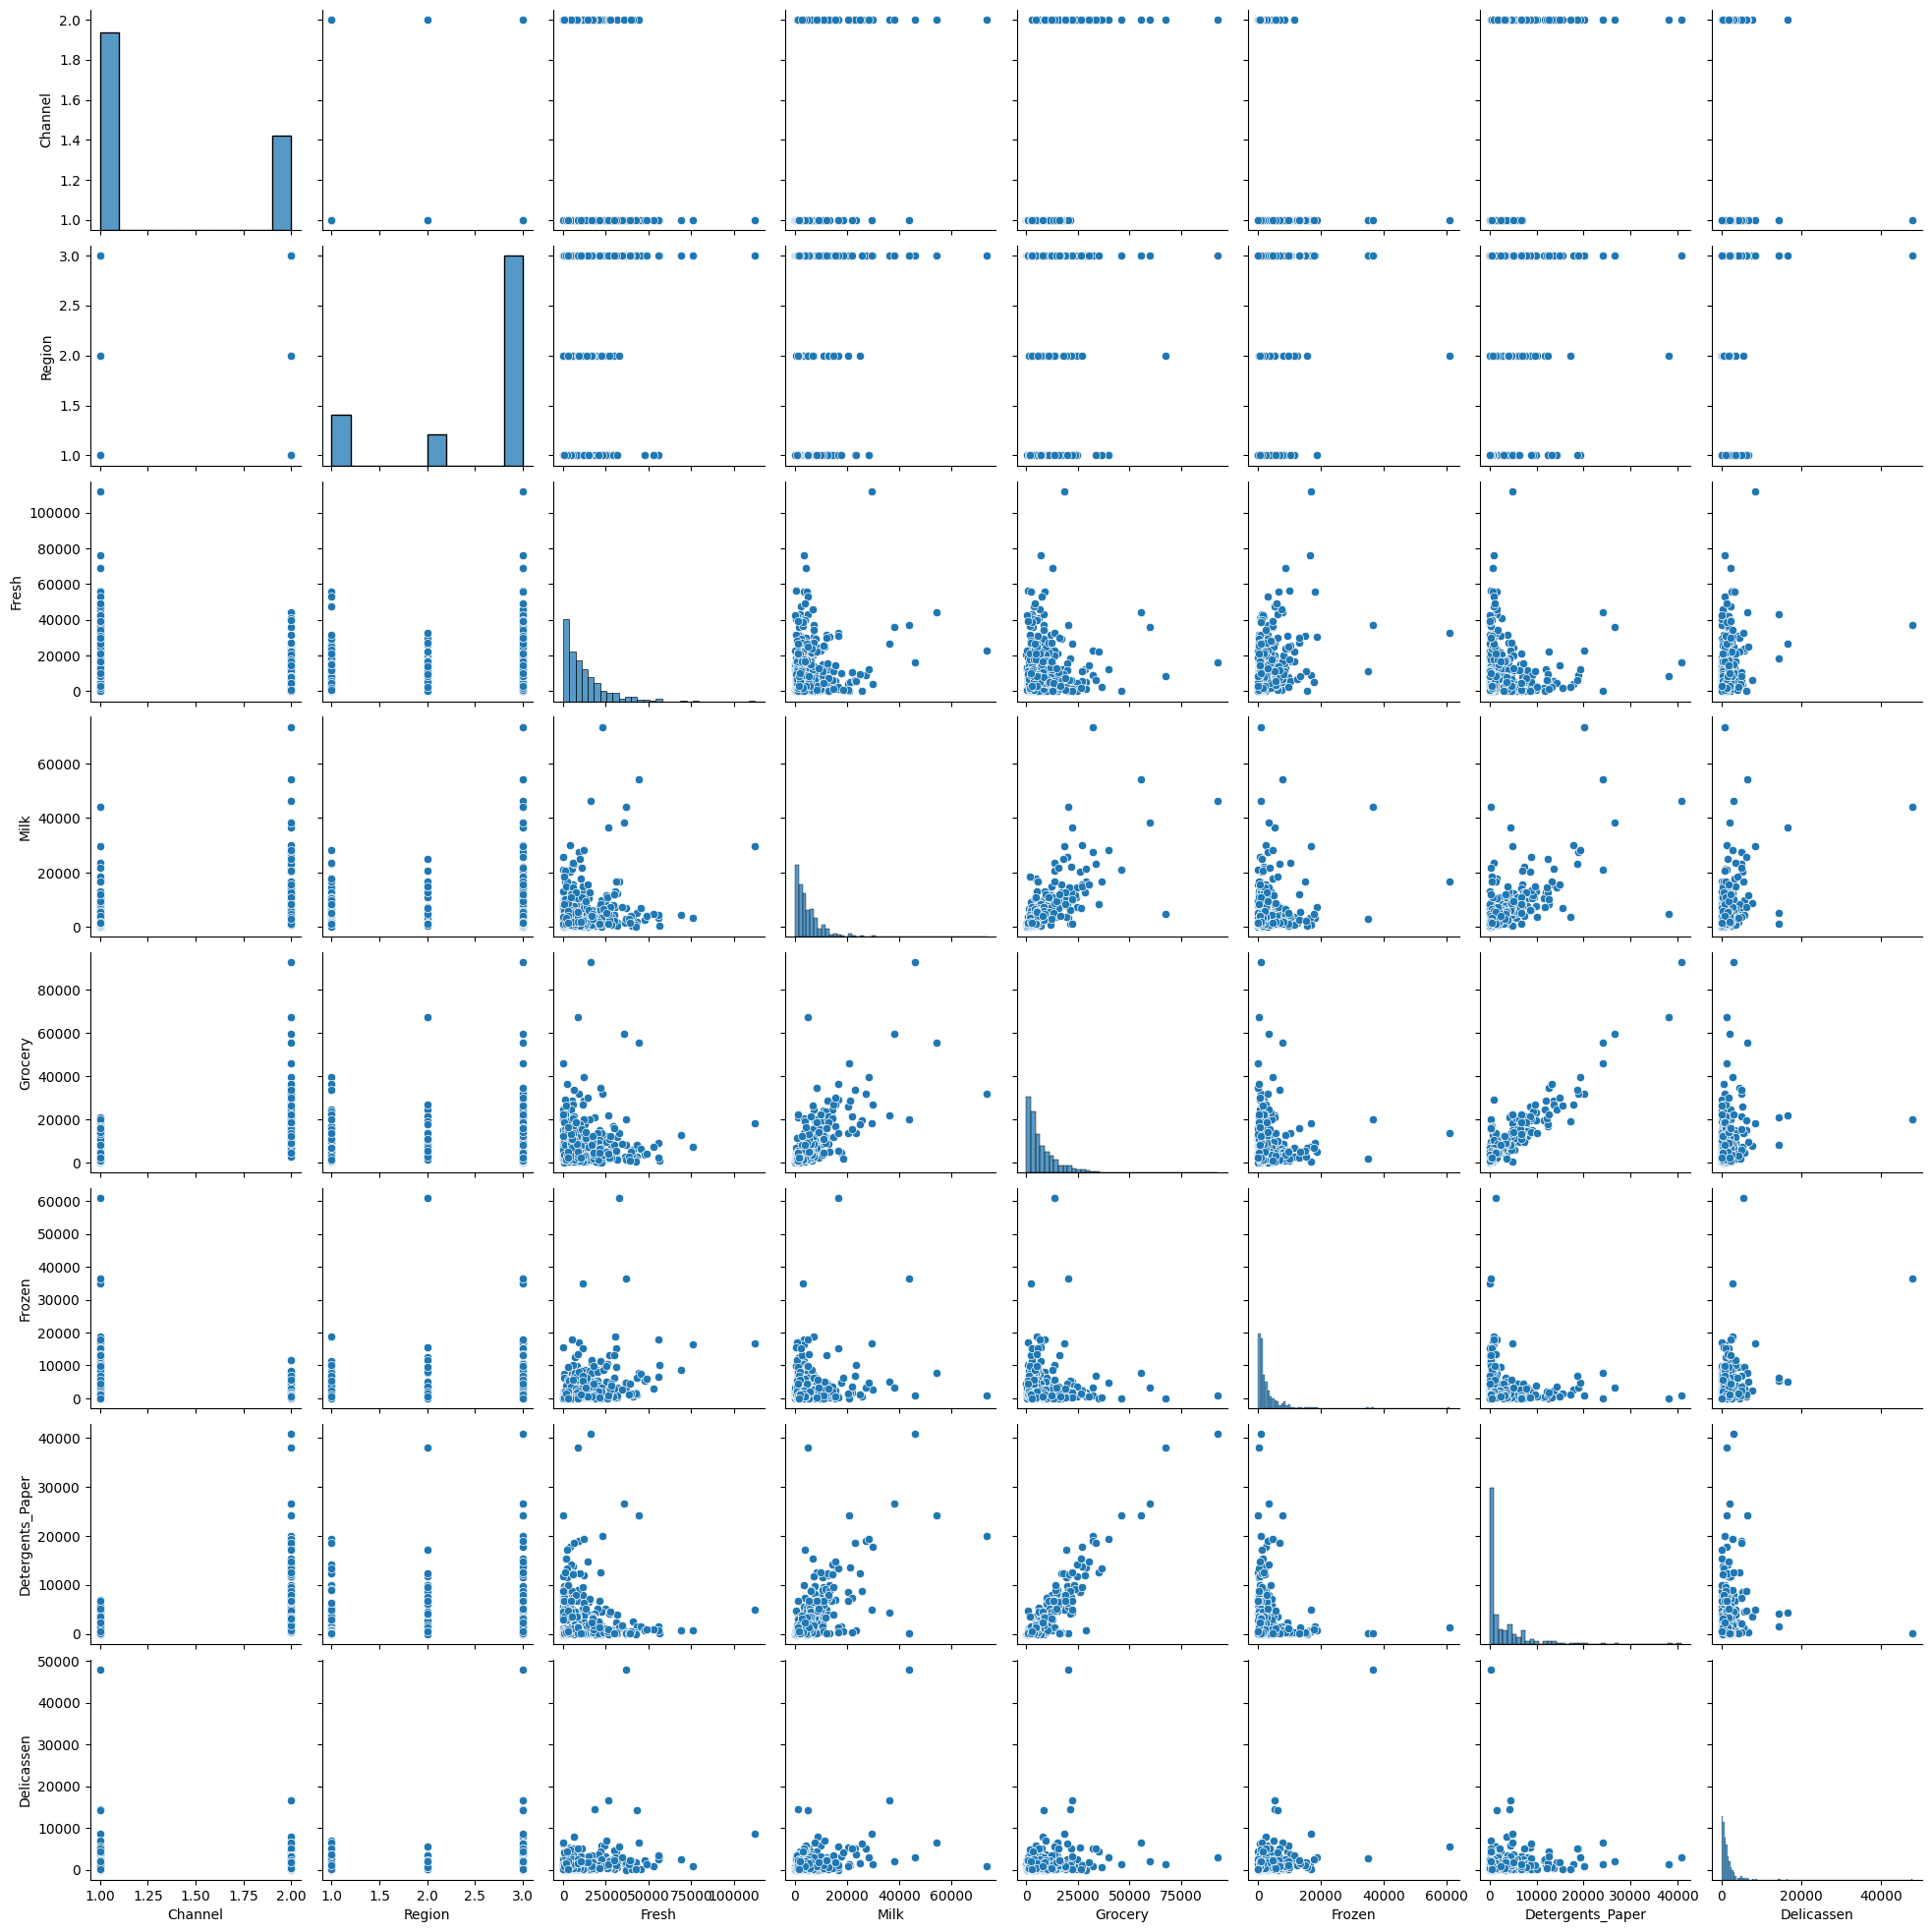

In [132]:
sns.pairplot(df)
plt.show()

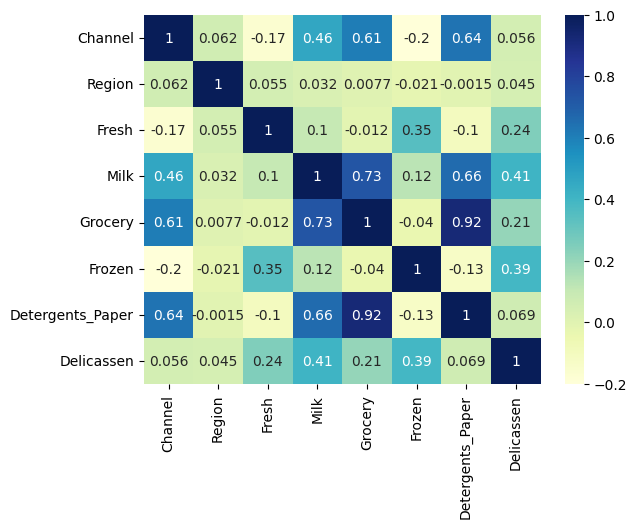

In [133]:
df.corr()
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### There is a strong correlation between grocery and detergrnts_paper, grocery and milk

In [134]:
# calculate Pearson's correlation
corr, _ = pearsonr(df['Grocery'], df['Detergents_Paper'])
print('Pearsons correlation grocery and detergrnts_paper: %.3f' % corr)

corr, _ = pearsonr(df['Grocery'], df['Milk'])
print('Pearsons correlation grocery and milk: %.3f' % corr)


Pearsons correlation grocery and detergrnts_paper: 0.925
Pearsons correlation grocery and milk: 0.728


<Axes: >

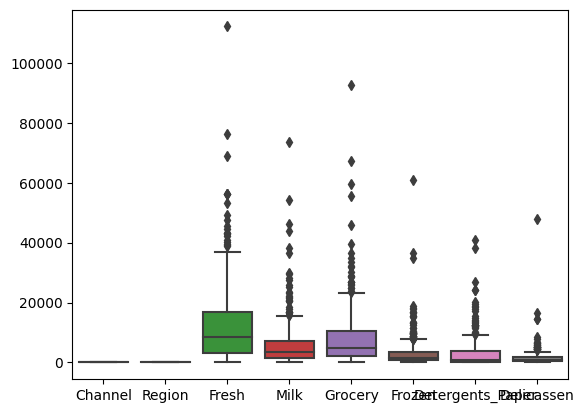

In [135]:
# there are valid outliers
sns.boxplot(df)

In [136]:
# data transformation
scaler = preprocessing.MinMaxScaler()
columns=df.columns
norm = scaler.fit_transform(df)

norm=pd.DataFrame(norm,columns=columns)
norm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

c:\Abubaker\all\Study_School_Univ_DCare_Cert\Mohammed\LightHouse - DataSciense BootCamp\pythonenv\gen\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Abubaker\all\Study_School_Univ_DCare_Cert\Mohammed\LightHouse - DataSciense BootCamp\pythonenv\gen\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Abubaker\all\Study_School_Univ_DCare_Cert\Mohammed\LightHouse - DataSciense BootCamp\pythonenv\gen\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Abubaker\all\Study_School_Univ_DCare_Cert\Mohammed\LightHouse - DataSciense BootCamp\pythonenv\gen\l

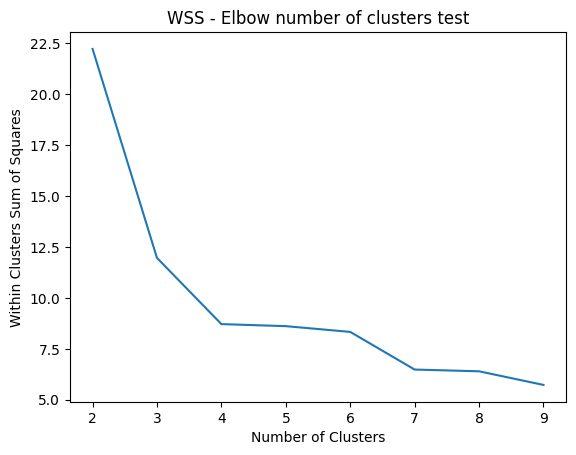

In [137]:
elbow_results=[]
for i in range(2,10):
    kmeans=KMeans(init='k-means++' , n_clusters=i, random_state=0)
    results=cross_validate(kmeans, norm, cv=5)
    elbow_results.append(results['test_score'].mean()*-1)
plt.plot(range(2,len(elbow_results)+2) , elbow_results)
plt.title('WSS - Elbow number of clusters test')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares')
plt.show()

In [139]:
# best cluster number is 3
kmeans=KMeans(init='k-means++' , n_clusters=3, random_state=0)
cluster_model=kmeans.fit(norm)
norm['clusters']=cluster_model.predict(norm)
norm.head()

c:\Abubaker\all\Study_School_Univ_DCare_Cert\Mohammed\LightHouse - DataSciense BootCamp\pythonenv\gen\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,2
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0


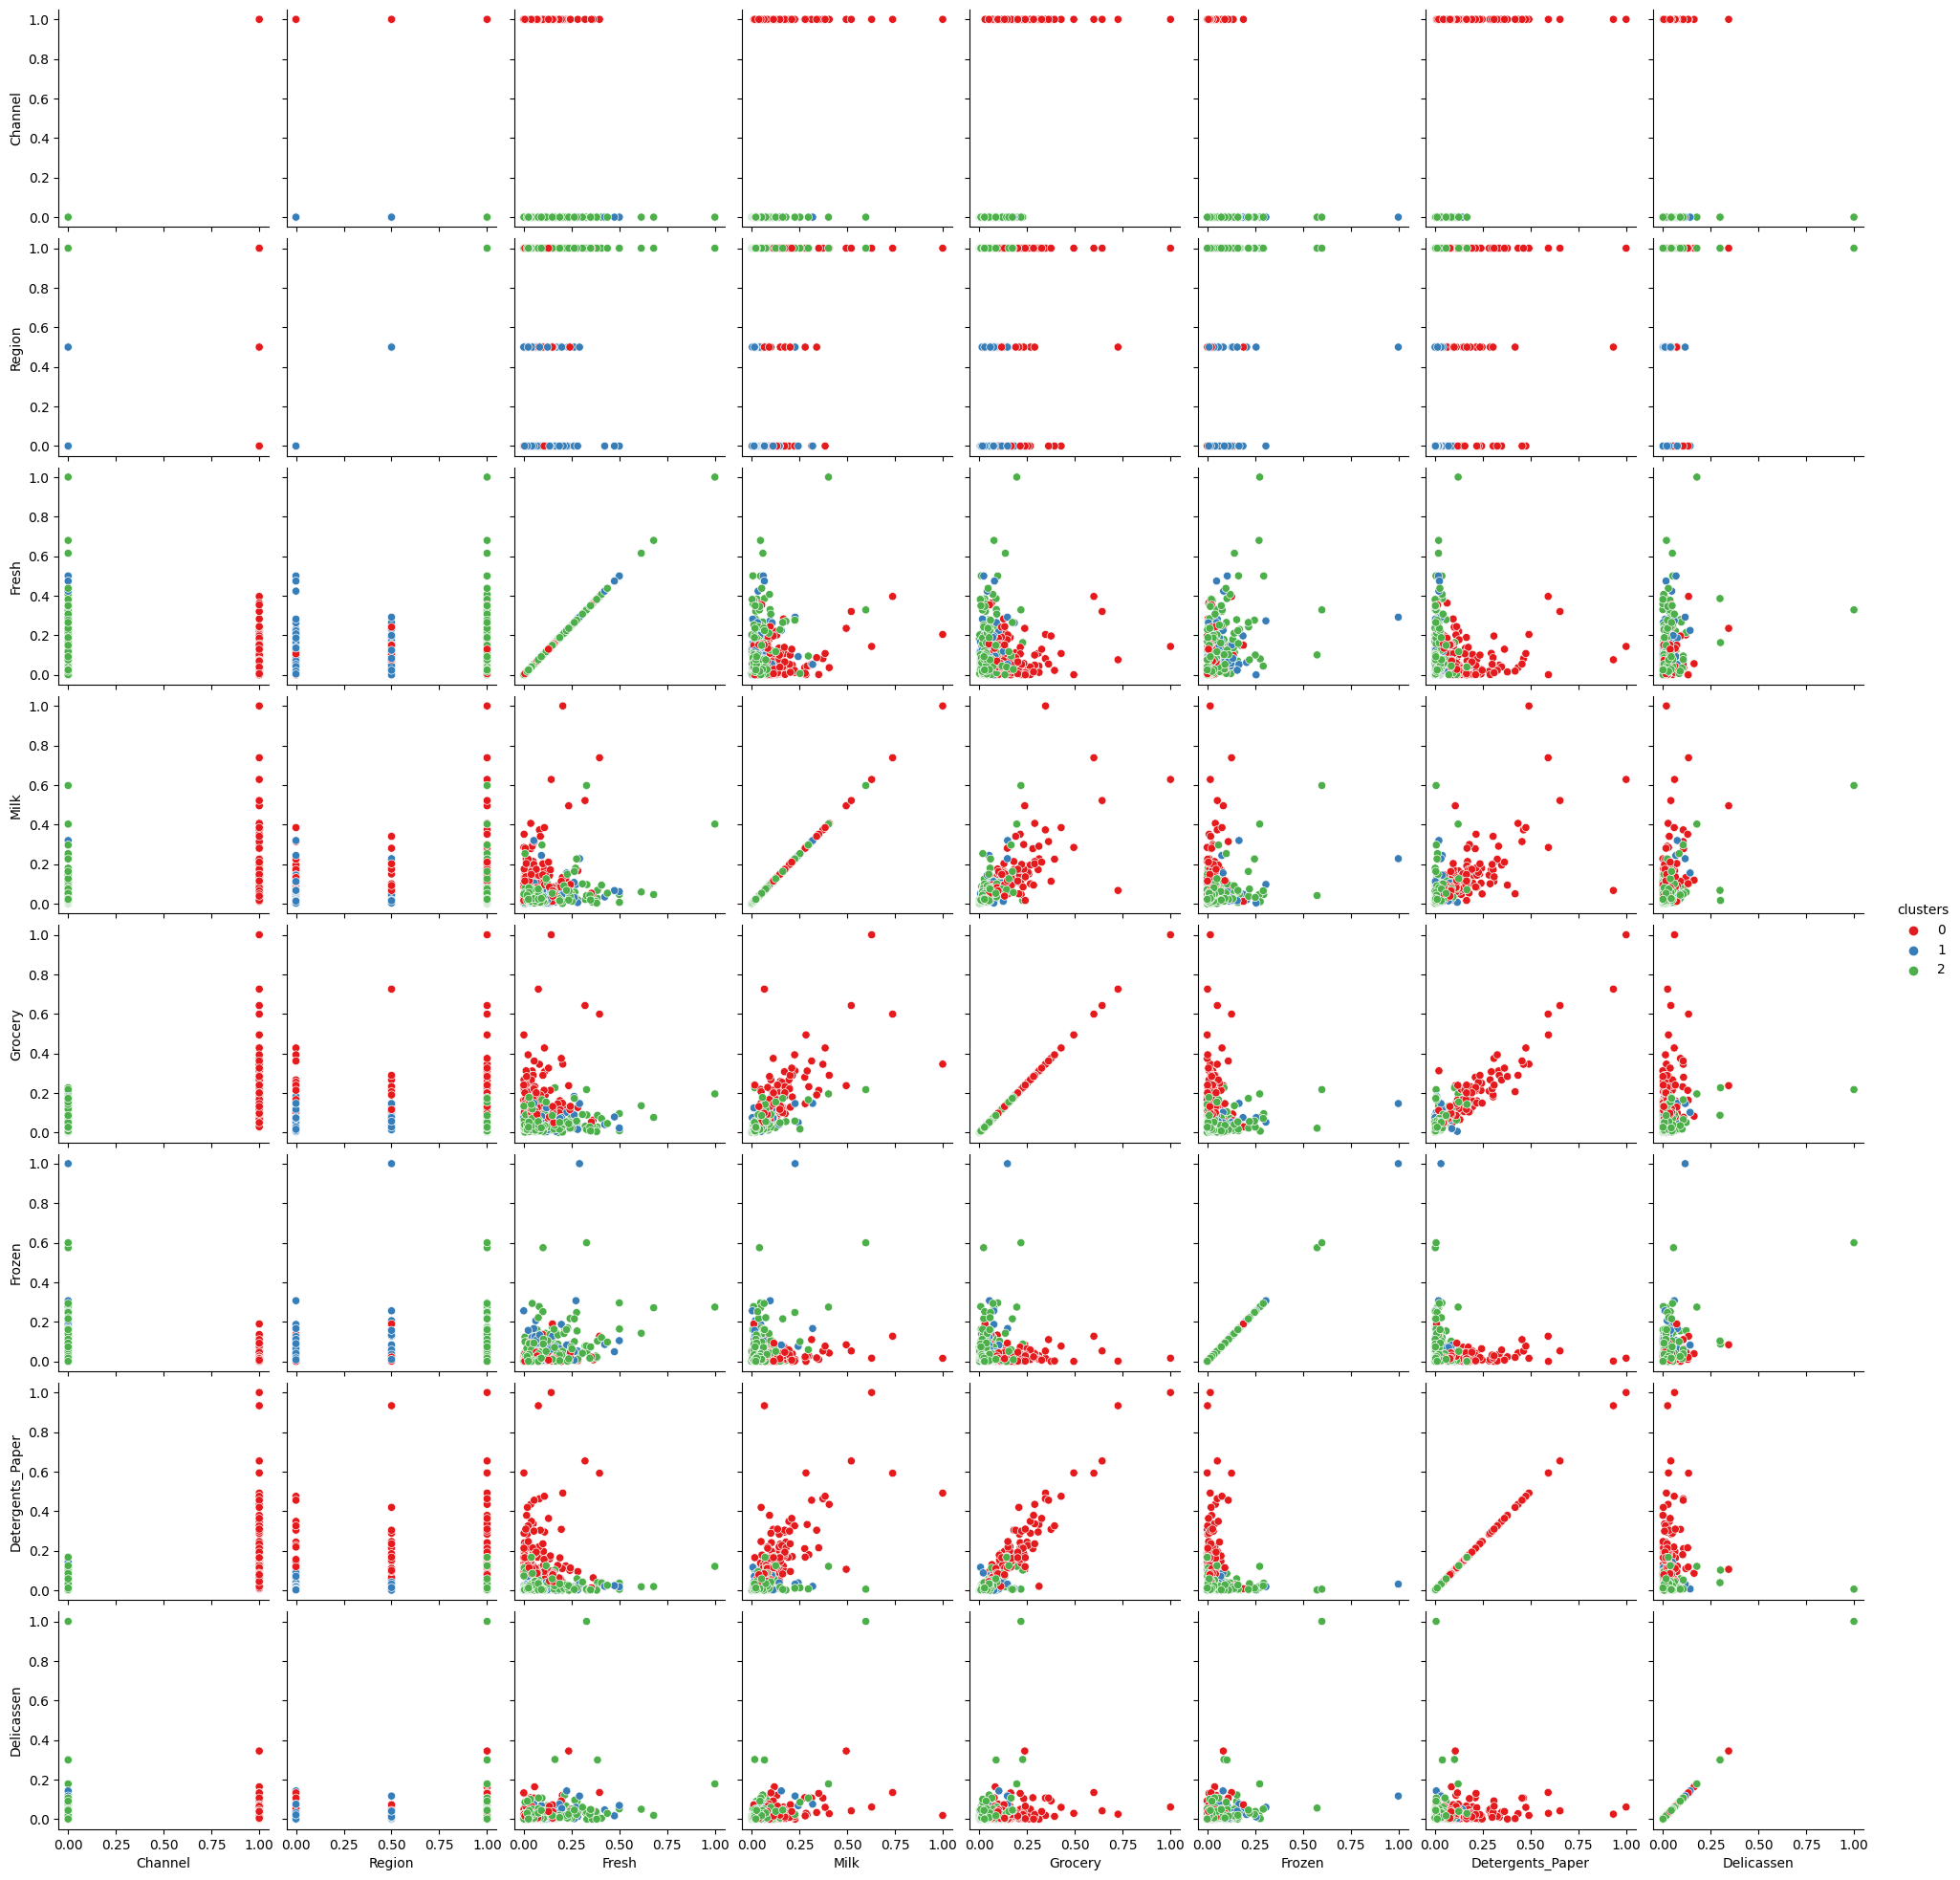

In [140]:
sns.pairplot(norm, hue='clusters', diag_kind=None, vars=df.columns[0:-1], palette='Set1')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [142]:
norm_hc = df.drop('clusters', axis=1)

In [143]:
hc = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)
norm_hc['clusters'] = hc.fit_predict(norm_hc)

c:\Abubaker\all\Study_School_Univ_DCare_Cert\Mohammed\LightHouse - DataSciense BootCamp\pythonenv\gen\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [144]:
fig=px.scatter_3d(x=norm_hc['Grocery'],y=norm_hc['Milk'],z=norm_hc['Detergents_Paper'],color=norm_hc['clusters'],size_max=30)
fig.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [145]:
norm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,2
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0


In [146]:
pca=PCA(n_components=len(norm.columns)-1)
pca.fit(df.iloc[:,:-1])
pca.explained_variance_ratio_

array([4.59613616e-01, 4.05172267e-01, 7.00300803e-02, 4.40234434e-02,
       1.50221159e-02, 6.13847509e-03, 1.65918973e-09, 3.39997724e-10])

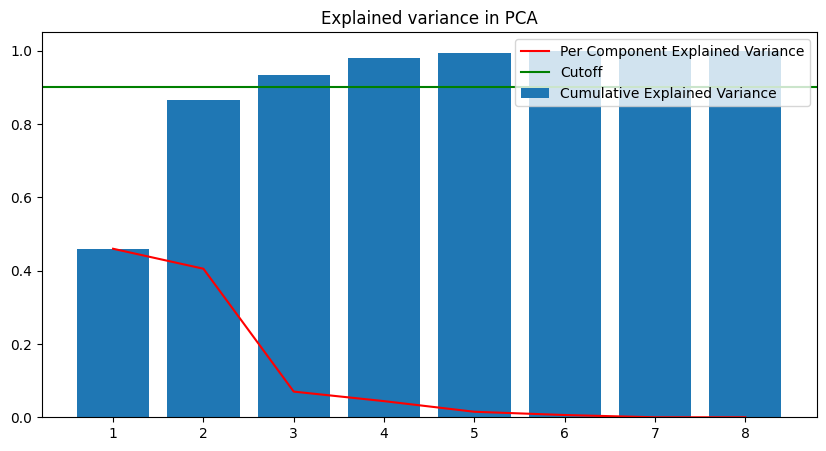

In [148]:
plt.figure(figsize=(10,5))
plt.plot(range(1,9),pca.explained_variance_ratio_, c='red', label='Per Component Explained Variance')
plt.bar(range(1,9), height=np.cumsum(pca.explained_variance_ratio_), label='Cumulative Explained Variance')
plt.axhline(y=0.9, c='g', label='Cutoff')
plt.title('Explained variance in PCA')
plt.xticks(range(1,9))
plt.legend(loc=1)
plt.show()

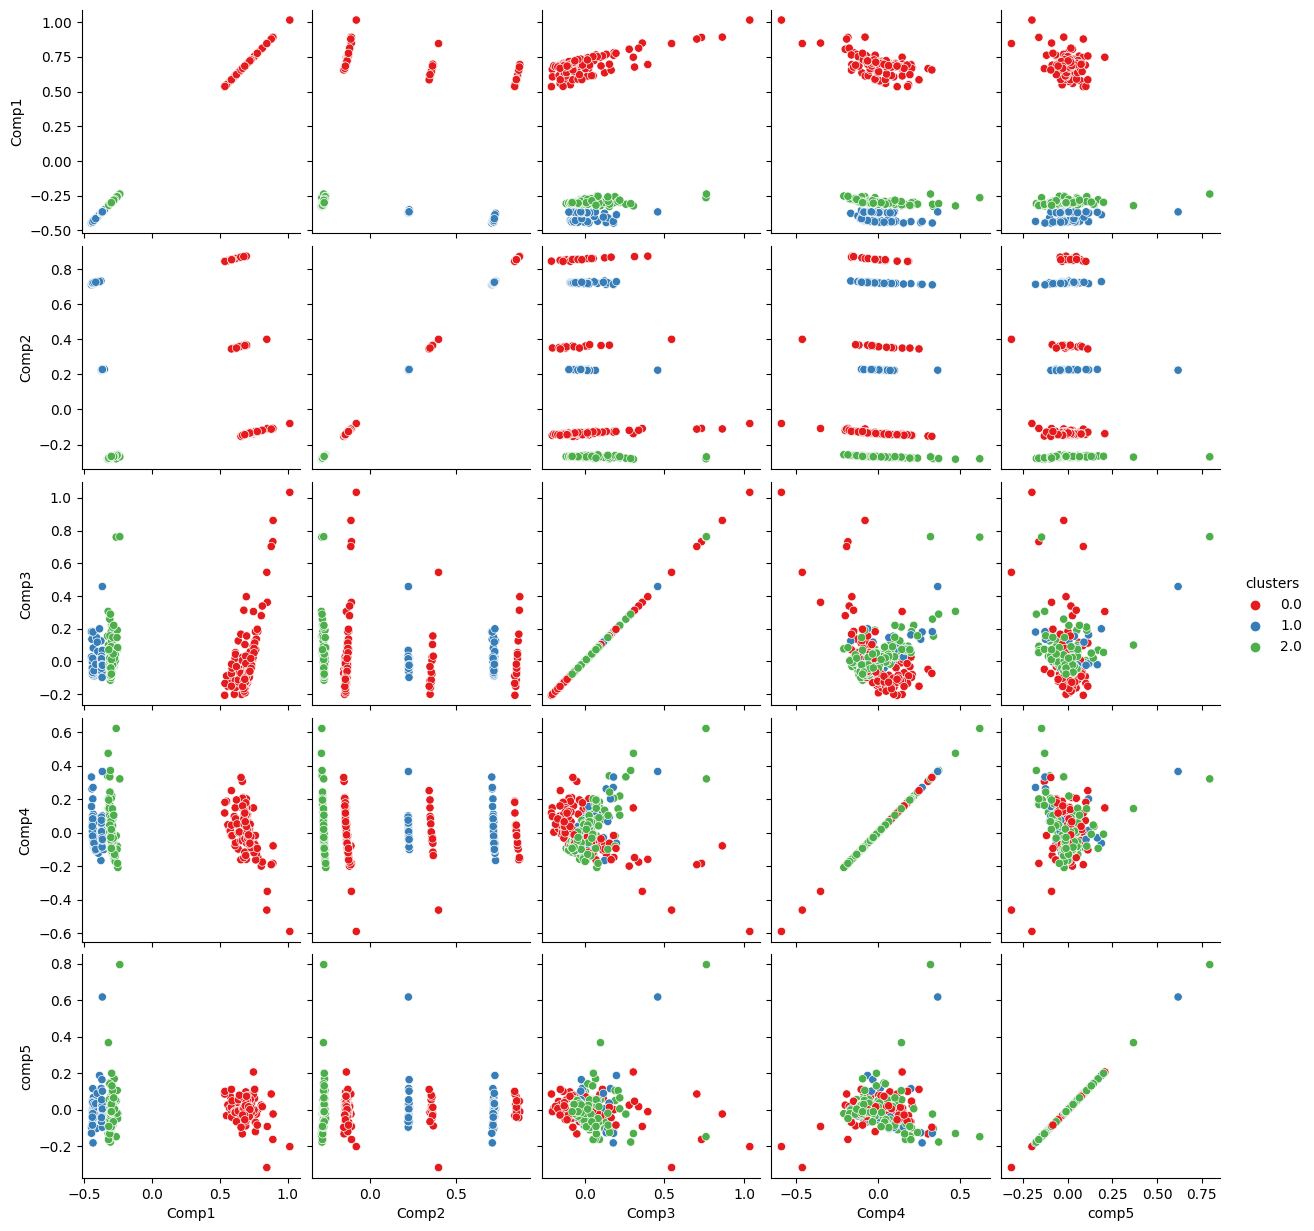

In [149]:
# we need only 5 componenets
pca=PCA(n_components=5)
reduced=pca.fit_transform(norm.iloc[:,:-1])

reduced=pd.DataFrame(np.column_stack([reduced, norm.clusters]), columns=['Comp1','Comp2','Comp3','Comp4','comp5','clusters'])

sns.pairplot(reduced, hue='clusters', diag_kind=None, vars=reduced.columns[0:-1], palette='Set1')
plt.show()


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- Dataset has no missing value.
- Dataset has a valid outliers.
- Best cluster number as per the elbow technique is 3.
- we are able to redcuce the dimenstion to 5 only by using PCA.
- There is strong correlation between Milk, Grocery and Detergent paper.
